## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9739584	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9553727	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9355993	total: 60.3ms	remaining: 20.1s
3:	learn: 0.9178625	total: 61.1ms	remaining: 15.2s
4:	learn: 0.9007403	total: 62ms	remaining: 12.3s
5:	learn: 0.8839375	total: 62.9ms	remaining: 10.4s
6:	learn: 0.8671081	total: 63.7ms	remaining: 9.04s
7:	learn: 0.8516317	total: 64.6ms	remaining: 8.01s
8:	learn: 0.8363073	total: 65.6ms	remaining: 7.22s
9:	learn: 0.8208720	total: 66.6ms	remaining: 6.59s
10:	learn: 0.8058219	total: 67.6ms	remaining: 6.08s
11:	learn: 0.7912612	total: 68.4ms	remaining: 5.63s
12:	learn: 0.7776522	total: 69.2ms	remaining: 5.25s
13:	learn: 0.7635376	total: 70ms	remaining: 4.93s
14:	learn: 0.7498657	total: 70.8ms	remaining: 4.65s
15:	learn: 0.7373084	total: 71.6ms	remaining: 4.4s
16:	learn: 0.7250119	total: 72.3ms	remaining: 4.18s
17:	learn: 0.7134746	total: 73.1ms	remaining: 3.99s
18:	learn: 0.7012648	total: 73.9ms	remaining: 3.8

60:	learn: 0.4187017	total: 109ms	remaining: 1.68s
61:	learn: 0.4133908	total: 110ms	remaining: 1.67s
62:	learn: 0.4101105	total: 111ms	remaining: 1.66s
63:	learn: 0.4055432	total: 112ms	remaining: 1.64s
64:	learn: 0.4009218	total: 113ms	remaining: 1.62s
65:	learn: 0.3970827	total: 114ms	remaining: 1.61s
66:	learn: 0.3935980	total: 115ms	remaining: 1.6s
67:	learn: 0.3900681	total: 116ms	remaining: 1.58s
68:	learn: 0.3870992	total: 116ms	remaining: 1.57s
69:	learn: 0.3837956	total: 117ms	remaining: 1.56s
70:	learn: 0.3816122	total: 118ms	remaining: 1.54s
71:	learn: 0.3796744	total: 119ms	remaining: 1.53s
72:	learn: 0.3766769	total: 120ms	remaining: 1.52s
73:	learn: 0.3736968	total: 121ms	remaining: 1.51s
74:	learn: 0.3706240	total: 121ms	remaining: 1.5s
75:	learn: 0.3668307	total: 122ms	remaining: 1.49s
76:	learn: 0.3648180	total: 123ms	remaining: 1.47s
77:	learn: 0.3628398	total: 124ms	remaining: 1.46s
78:	learn: 0.3595205	total: 124ms	remaining: 1.45s
79:	learn: 0.3567483	total: 125ms

159:	learn: 0.2501433	total: 191ms	remaining: 1s
160:	learn: 0.2491316	total: 192ms	remaining: 999ms
161:	learn: 0.2484746	total: 193ms	remaining: 997ms
162:	learn: 0.2479960	total: 194ms	remaining: 994ms
163:	learn: 0.2471450	total: 194ms	remaining: 991ms
164:	learn: 0.2464034	total: 195ms	remaining: 988ms
165:	learn: 0.2457806	total: 196ms	remaining: 985ms
166:	learn: 0.2452935	total: 197ms	remaining: 982ms
167:	learn: 0.2443687	total: 198ms	remaining: 979ms
168:	learn: 0.2438499	total: 199ms	remaining: 976ms
169:	learn: 0.2431450	total: 199ms	remaining: 973ms
170:	learn: 0.2426346	total: 200ms	remaining: 970ms
171:	learn: 0.2417490	total: 201ms	remaining: 967ms
172:	learn: 0.2410118	total: 202ms	remaining: 964ms
173:	learn: 0.2402109	total: 202ms	remaining: 961ms
174:	learn: 0.2392440	total: 203ms	remaining: 958ms
175:	learn: 0.2386932	total: 204ms	remaining: 955ms
176:	learn: 0.2376521	total: 205ms	remaining: 952ms
177:	learn: 0.2368814	total: 206ms	remaining: 949ms
178:	learn: 0.2

287:	learn: 0.1769358	total: 298ms	remaining: 737ms
288:	learn: 0.1764792	total: 299ms	remaining: 736ms
289:	learn: 0.1760825	total: 300ms	remaining: 734ms
290:	learn: 0.1757038	total: 301ms	remaining: 733ms
291:	learn: 0.1752679	total: 302ms	remaining: 731ms
292:	learn: 0.1746768	total: 302ms	remaining: 730ms
293:	learn: 0.1744062	total: 303ms	remaining: 728ms
294:	learn: 0.1741667	total: 305ms	remaining: 728ms
295:	learn: 0.1735858	total: 305ms	remaining: 726ms
296:	learn: 0.1731392	total: 306ms	remaining: 725ms
297:	learn: 0.1727351	total: 307ms	remaining: 723ms
298:	learn: 0.1723670	total: 308ms	remaining: 722ms
299:	learn: 0.1721980	total: 309ms	remaining: 720ms
300:	learn: 0.1718974	total: 310ms	remaining: 719ms
301:	learn: 0.1715702	total: 311ms	remaining: 718ms
302:	learn: 0.1710878	total: 311ms	remaining: 716ms
303:	learn: 0.1706740	total: 312ms	remaining: 715ms
304:	learn: 0.1704422	total: 313ms	remaining: 713ms
305:	learn: 0.1701288	total: 314ms	remaining: 713ms
306:	learn: 

386:	learn: 0.1471694	total: 382ms	remaining: 604ms
387:	learn: 0.1469910	total: 382ms	remaining: 603ms
388:	learn: 0.1466211	total: 383ms	remaining: 602ms
389:	learn: 0.1464610	total: 384ms	remaining: 601ms
390:	learn: 0.1460496	total: 385ms	remaining: 599ms
391:	learn: 0.1457002	total: 386ms	remaining: 598ms
392:	learn: 0.1454811	total: 387ms	remaining: 597ms
393:	learn: 0.1452749	total: 387ms	remaining: 596ms
394:	learn: 0.1450193	total: 388ms	remaining: 595ms
395:	learn: 0.1446123	total: 389ms	remaining: 594ms
396:	learn: 0.1443632	total: 390ms	remaining: 592ms
397:	learn: 0.1441206	total: 391ms	remaining: 591ms
398:	learn: 0.1438421	total: 392ms	remaining: 590ms
399:	learn: 0.1438154	total: 392ms	remaining: 589ms
400:	learn: 0.1437446	total: 393ms	remaining: 588ms
401:	learn: 0.1433585	total: 394ms	remaining: 586ms
402:	learn: 0.1431257	total: 395ms	remaining: 585ms
403:	learn: 0.1428888	total: 396ms	remaining: 584ms
404:	learn: 0.1425616	total: 397ms	remaining: 583ms
405:	learn: 

476:	learn: 0.1266945	total: 456ms	remaining: 500ms
477:	learn: 0.1265422	total: 457ms	remaining: 499ms
478:	learn: 0.1262859	total: 458ms	remaining: 498ms
479:	learn: 0.1260072	total: 459ms	remaining: 497ms
480:	learn: 0.1257261	total: 460ms	remaining: 496ms
481:	learn: 0.1254715	total: 461ms	remaining: 495ms
482:	learn: 0.1252437	total: 461ms	remaining: 494ms
483:	learn: 0.1249743	total: 462ms	remaining: 493ms
484:	learn: 0.1247824	total: 463ms	remaining: 491ms
485:	learn: 0.1245694	total: 464ms	remaining: 490ms
486:	learn: 0.1243207	total: 465ms	remaining: 489ms
487:	learn: 0.1241348	total: 465ms	remaining: 488ms
488:	learn: 0.1239489	total: 466ms	remaining: 487ms
489:	learn: 0.1237990	total: 467ms	remaining: 486ms
490:	learn: 0.1234737	total: 468ms	remaining: 485ms
491:	learn: 0.1231910	total: 469ms	remaining: 484ms
492:	learn: 0.1230651	total: 469ms	remaining: 483ms
493:	learn: 0.1229768	total: 470ms	remaining: 482ms
494:	learn: 0.1227134	total: 471ms	remaining: 481ms
495:	learn: 

555:	learn: 0.1106523	total: 523ms	remaining: 418ms
556:	learn: 0.1104559	total: 524ms	remaining: 417ms
557:	learn: 0.1102250	total: 525ms	remaining: 416ms
558:	learn: 0.1100943	total: 526ms	remaining: 415ms
559:	learn: 0.1099298	total: 526ms	remaining: 414ms
560:	learn: 0.1096712	total: 527ms	remaining: 413ms
561:	learn: 0.1093882	total: 528ms	remaining: 412ms
562:	learn: 0.1092525	total: 530ms	remaining: 411ms
563:	learn: 0.1090611	total: 530ms	remaining: 410ms
564:	learn: 0.1088841	total: 531ms	remaining: 409ms
565:	learn: 0.1086742	total: 532ms	remaining: 408ms
566:	learn: 0.1084409	total: 533ms	remaining: 407ms
567:	learn: 0.1081985	total: 534ms	remaining: 406ms
568:	learn: 0.1080866	total: 535ms	remaining: 405ms
569:	learn: 0.1078123	total: 536ms	remaining: 404ms
570:	learn: 0.1077754	total: 536ms	remaining: 403ms
571:	learn: 0.1075942	total: 537ms	remaining: 402ms
572:	learn: 0.1074346	total: 538ms	remaining: 401ms
573:	learn: 0.1071800	total: 540ms	remaining: 401ms
574:	learn: 

696:	learn: 0.0878846	total: 647ms	remaining: 281ms
697:	learn: 0.0877935	total: 648ms	remaining: 280ms
698:	learn: 0.0876676	total: 648ms	remaining: 279ms
699:	learn: 0.0875691	total: 649ms	remaining: 278ms
700:	learn: 0.0873945	total: 650ms	remaining: 277ms
701:	learn: 0.0873568	total: 651ms	remaining: 276ms
702:	learn: 0.0872836	total: 652ms	remaining: 275ms
703:	learn: 0.0871693	total: 653ms	remaining: 275ms
704:	learn: 0.0871380	total: 654ms	remaining: 274ms
705:	learn: 0.0870000	total: 655ms	remaining: 273ms
706:	learn: 0.0869136	total: 656ms	remaining: 272ms
707:	learn: 0.0868177	total: 656ms	remaining: 271ms
708:	learn: 0.0867031	total: 657ms	remaining: 270ms
709:	learn: 0.0865427	total: 658ms	remaining: 269ms
710:	learn: 0.0863924	total: 659ms	remaining: 268ms
711:	learn: 0.0862436	total: 659ms	remaining: 267ms
712:	learn: 0.0860609	total: 660ms	remaining: 266ms
713:	learn: 0.0859196	total: 661ms	remaining: 265ms
714:	learn: 0.0857678	total: 662ms	remaining: 264ms
715:	learn: 

756:	learn: 0.0808137	total: 698ms	remaining: 224ms
757:	learn: 0.0807754	total: 699ms	remaining: 223ms
758:	learn: 0.0805891	total: 700ms	remaining: 222ms
759:	learn: 0.0804928	total: 700ms	remaining: 221ms
760:	learn: 0.0802810	total: 701ms	remaining: 220ms
761:	learn: 0.0801993	total: 702ms	remaining: 219ms
762:	learn: 0.0800980	total: 703ms	remaining: 218ms
763:	learn: 0.0799671	total: 704ms	remaining: 217ms
764:	learn: 0.0797566	total: 705ms	remaining: 216ms
765:	learn: 0.0795884	total: 706ms	remaining: 216ms
766:	learn: 0.0795067	total: 706ms	remaining: 215ms
767:	learn: 0.0793706	total: 707ms	remaining: 214ms
768:	learn: 0.0792029	total: 708ms	remaining: 213ms
769:	learn: 0.0790691	total: 710ms	remaining: 212ms
770:	learn: 0.0790262	total: 712ms	remaining: 211ms
771:	learn: 0.0788963	total: 713ms	remaining: 210ms
772:	learn: 0.0788179	total: 713ms	remaining: 209ms
773:	learn: 0.0786800	total: 714ms	remaining: 209ms
774:	learn: 0.0784650	total: 715ms	remaining: 208ms
775:	learn: 

900:	learn: 0.0662814	total: 821ms	remaining: 90.2ms
901:	learn: 0.0662013	total: 822ms	remaining: 89.3ms
902:	learn: 0.0660875	total: 823ms	remaining: 88.4ms
903:	learn: 0.0659668	total: 824ms	remaining: 87.5ms
904:	learn: 0.0658876	total: 825ms	remaining: 86.6ms
905:	learn: 0.0658297	total: 826ms	remaining: 85.7ms
906:	learn: 0.0657413	total: 826ms	remaining: 84.7ms
907:	learn: 0.0655877	total: 827ms	remaining: 83.8ms
908:	learn: 0.0655265	total: 828ms	remaining: 82.9ms
909:	learn: 0.0653988	total: 829ms	remaining: 82ms
910:	learn: 0.0653809	total: 830ms	remaining: 81.1ms
911:	learn: 0.0653648	total: 831ms	remaining: 80.1ms
912:	learn: 0.0652575	total: 831ms	remaining: 79.2ms
913:	learn: 0.0651483	total: 833ms	remaining: 78.4ms
914:	learn: 0.0650123	total: 834ms	remaining: 77.4ms
915:	learn: 0.0649153	total: 834ms	remaining: 76.5ms
916:	learn: 0.0647834	total: 835ms	remaining: 75.6ms
917:	learn: 0.0646681	total: 836ms	remaining: 74.7ms
918:	learn: 0.0645200	total: 837ms	remaining: 73

979:	learn: 0.0597363	total: 889ms	remaining: 18.1ms
980:	learn: 0.0596510	total: 889ms	remaining: 17.2ms
981:	learn: 0.0595953	total: 890ms	remaining: 16.3ms
982:	learn: 0.0595034	total: 891ms	remaining: 15.4ms
983:	learn: 0.0594101	total: 892ms	remaining: 14.5ms
984:	learn: 0.0593917	total: 893ms	remaining: 13.6ms
985:	learn: 0.0593159	total: 893ms	remaining: 12.7ms
986:	learn: 0.0592707	total: 894ms	remaining: 11.8ms
987:	learn: 0.0591996	total: 895ms	remaining: 10.9ms
988:	learn: 0.0591675	total: 896ms	remaining: 9.96ms
989:	learn: 0.0591119	total: 897ms	remaining: 9.06ms
990:	learn: 0.0590196	total: 897ms	remaining: 8.15ms
991:	learn: 0.0590000	total: 898ms	remaining: 7.24ms
992:	learn: 0.0589419	total: 899ms	remaining: 6.34ms
993:	learn: 0.0588899	total: 900ms	remaining: 5.43ms
994:	learn: 0.0588430	total: 901ms	remaining: 4.53ms
995:	learn: 0.0587583	total: 901ms	remaining: 3.62ms
996:	learn: 0.0587179	total: 902ms	remaining: 2.71ms
997:	learn: 0.0587066	total: 903ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

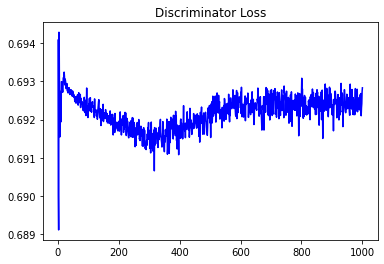

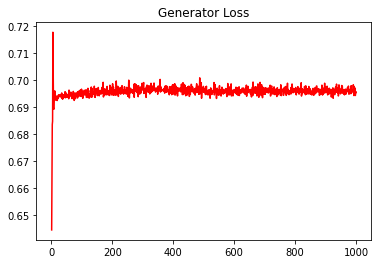

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13554723717525416


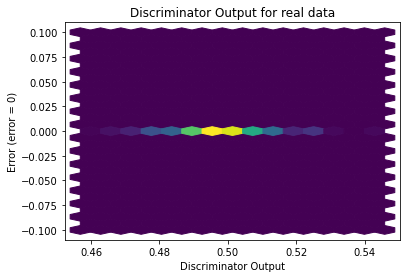

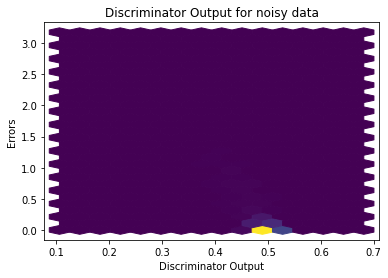

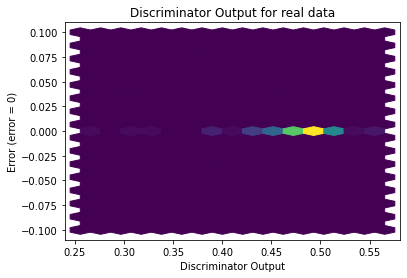

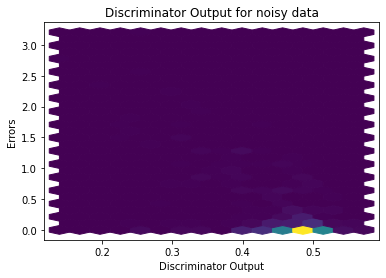

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


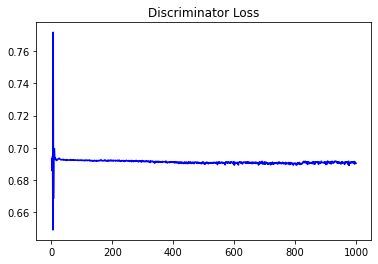

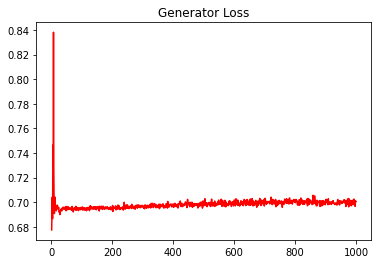

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1813320280368047


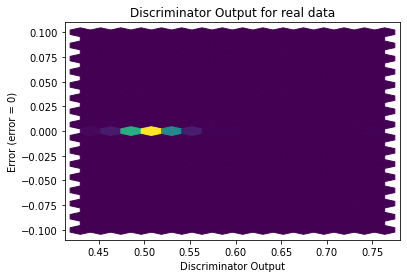

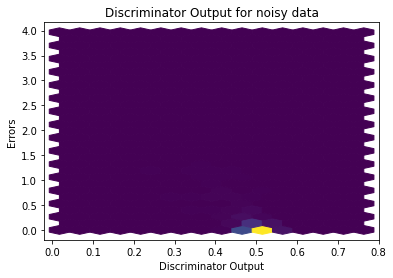

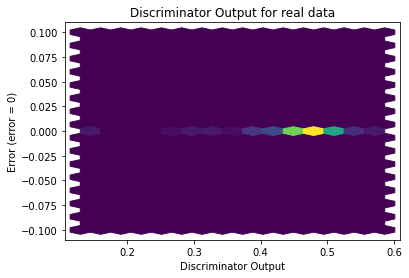

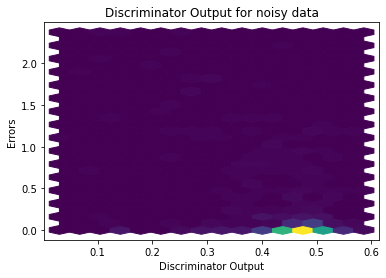

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9913]], requires_grad=True)
